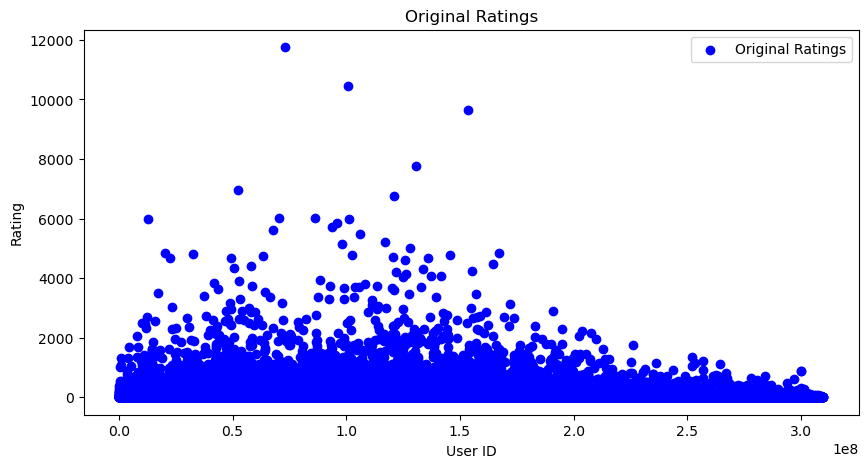

Mean Squared Error: 56529.326806446115


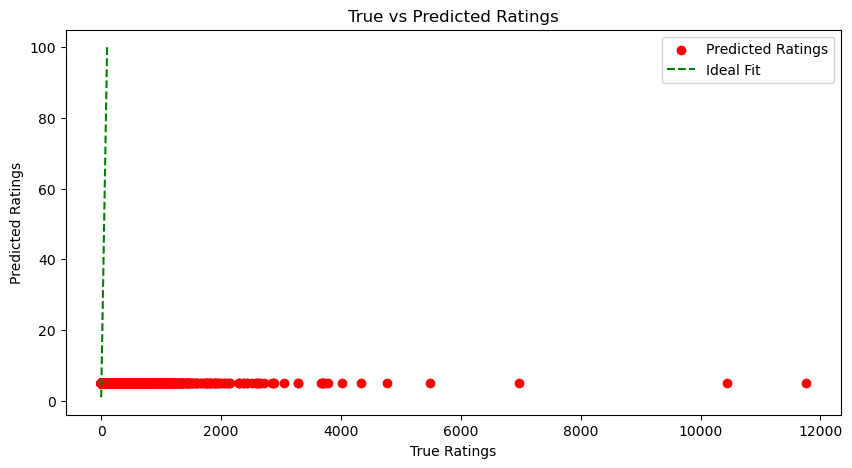

Recommendations for user 128470551: [('Orcs Must Die! 2', 5), ('XCOM Enemy Unknown', 5), ('Medieval II Total War', 5), ('Anno 2070', 5), ('Dungeons 2', 5)]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Load the dataset
headers = ['user_id', 'game', 'behavior', 'play_time', '0']
steam_data = pd.read_csv('steam-201k.csv', sep=',', names=headers)

steam_data = steam_data.drop(['0'],axis=1)

steam_data = steam_data.sort_values(by=['behavior'])
steam_data.head()
data = steam_data.loc[steam_data.behavior=='play']

# Sample data
# data = {
#     'user_id': [1, 4, 8, 2, 5, 2, 3, 6, 7],
#     'item_id': [1, 2, 3, 1, 2, 3, 1, 2, 3],
#     'rating': [5, 3, 4, 4, 2, 5, 1, 5, 4]
# }

df = pd.DataFrame(data)

# Plot the original ratings
plt.figure(figsize=(10, 5))
plt.scatter(df['user_id'], df['play_time'], color='blue', label='Original Ratings')
plt.xlabel('User ID')
plt.ylabel('Rating')
plt.title('Original Ratings')
plt.legend()
plt.show()

# Load data into Surprise dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'game', 'play_time']], reader)

# Split data into training and test sets
trainset, testset = train_test_split(data, test_size=0.25)

# Use SVD for collaborative filtering
algo = SVD()
algo.fit(trainset)

# Predict ratings for the test set
predictions = algo.test(testset)

# Extract true ratings and predicted ratings
true_ratings = [pred.r_ui for pred in predictions]
predicted_ratings = [pred.est for pred in predictions]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(true_ratings, predicted_ratings)
print(f"Mean Squared Error: {mse}")

# Plot the true vs predicted ratings
plt.figure(figsize=(10, 5))
plt.scatter(true_ratings, predicted_ratings, color='red', label='Predicted Ratings')
plt.plot([1, 100], [1, 100], color='green', linestyle='--', label='Ideal Fit')
plt.xlabel('True Ratings')
plt.ylabel('Predicted Ratings')
plt.title('True vs Predicted Ratings')
plt.legend()
plt.show()

# Function to get game recommendations for a user
def get_recommendations(user_id, num_recommendations=5):
    user_games = df[df['user_id'] == user_id]['game'].unique()
    all_games = df['game'].unique()
    recommendations = []
    for game_id in all_games:
        if game_id not in user_games:
            est = algo.predict(user_id, game_id).est
            recommendations.append((game_id, est))
    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations[:num_recommendations]

# Get recommendations for a specific user
user_id = 128470551
recommendations = get_recommendations(user_id)
print(f"Recommendations for user {user_id}: {recommendations}")

In [42]:
steam_data_play

,user_id,game,behavior,play_time
199999,128470551,RUSH,play,1.4
70753,43955374,Orcs Must Die! 2,play,17.1
70751,43955374,XCOM Enemy Unknown,play,17.3
154701,32126281,Medieval II Total War,play,14.4
70749,43955374,Anno 2070,play,17.5
...,...,...,...,...
44596,83849502,BIT.TRIP RUNNER,play,0.1
199989,128470551,Mortal Kombat Komplete Edition,play,2.5
35284,59115473,Borderlands 2,play,14.2
176508,77214425,Portal,play,0.4
